Please upload your Eurostat CSV file (SDMX-CSV format).


Saving demo_pjan__custom_19136369_linear.csv to demo_pjan__custom_19136369_linear.csv
File loaded: demo_pjan__custom_19136369_linear.csv
Cleaned Lithuania Population Data:


,year,population
0,1990,3693708.0
1,1991,3701968.0
2,1992,3706299.0
3,1993,3693929.0
4,1994,3671296.0


,year,population
30,2020,2809977.0
31,2021,2810761.0
32,2022,2805998.0
33,2023,2857279.0
34,2024,2885891.0


SUMMARY STATISTICS (1990–2024)
Total population change: -807,817 people
Average yearly % change: -0.720%
Worst year of population loss: 2011 (-89,388 people)


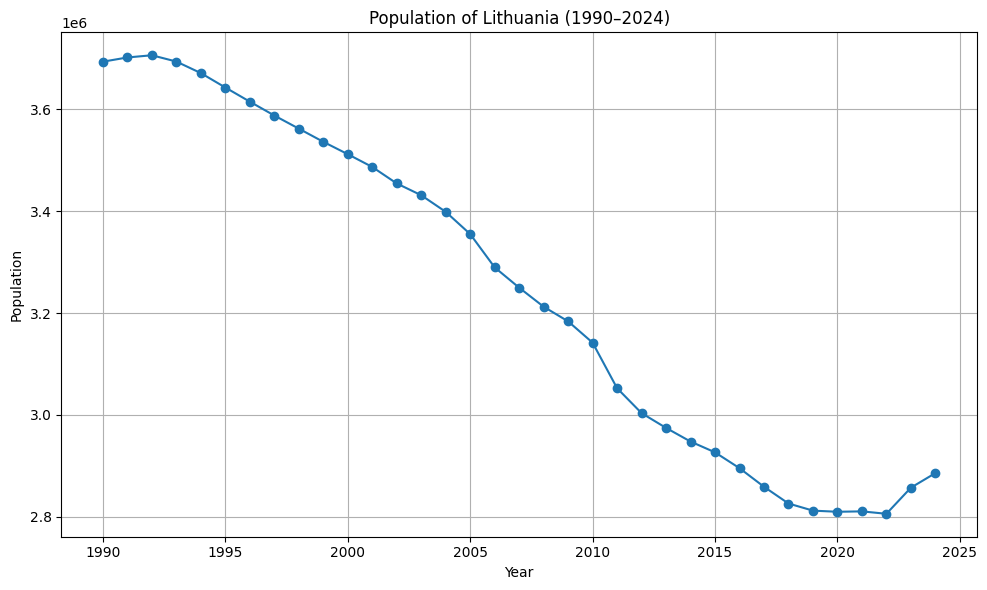

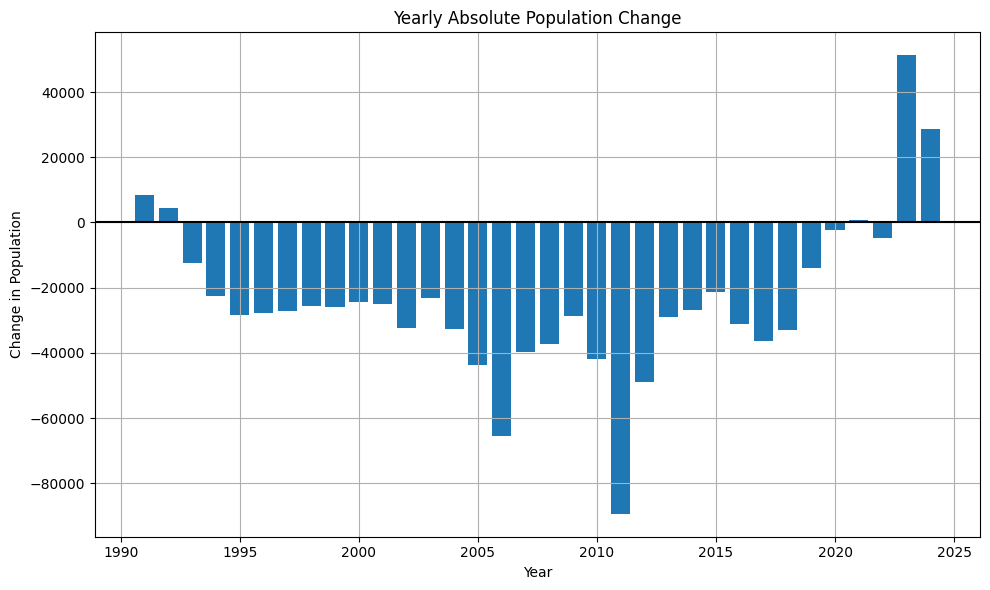

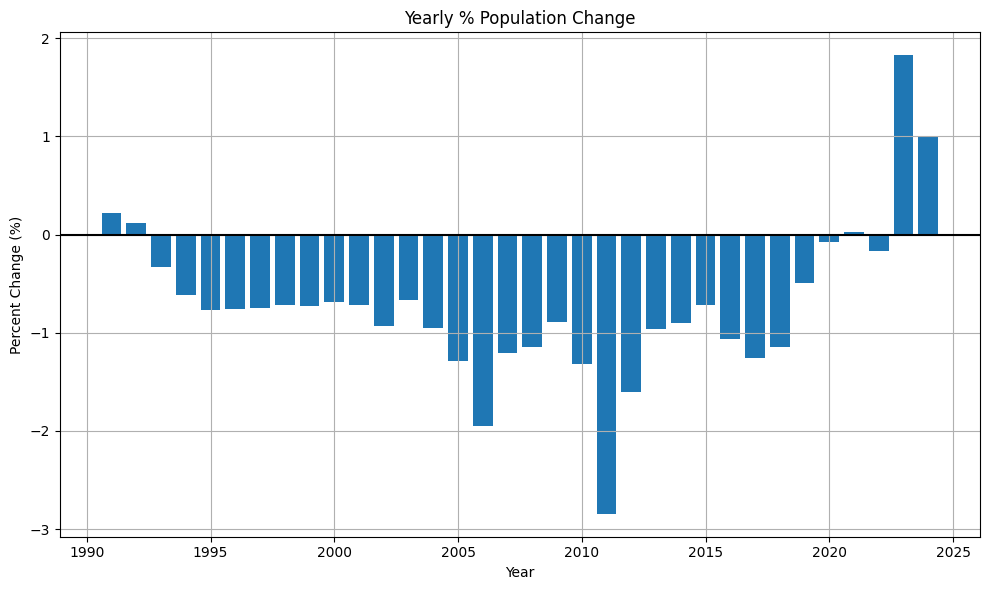


All figures saved:
- lt_population_trend.png
- lt_population_abs_change.png
- lt_population_pct_change.png


In [ ]:
# ================================================================
# Lithuania Population Decline Analysis (1990–2024)
# Student: Milad Seifi
# ================================================================

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.grid"] = True

# ================================================================
# STEP 1 — Upload the CSV file downloaded from Eurostat
# ================================================================
print("Please upload your Eurostat CSV file (SDMX-CSV format).")
uploaded = files.upload()

csv_path = list(uploaded.keys())[0]
print("File loaded:", csv_path)


# ================================================================
# STEP 2 — Load & Clean Population Data
# ================================================================
def load_lithuania_population(csv_path: str) -> pd.DataFrame:
    """
    Loads Eurostat SDMX-CSV population file and extracts:
    - Lithuania (geo = LT or Lithuania)
    - Sex = Total
    - Age = Total
    - 1990–2024
    """
    df = pd.read_csv(csv_path)

    # Try common Eurostat column names
    rename_map = {
        "TIME_PERIOD": "year",
        "OBS_VALUE": "population",
        "geo": "geo",
        "sex": "sex",
        "age": "age",
    }
    df = df.rename(columns=rename_map)

    # Convert year
    df["year"] = pd.to_numeric(df["year"], errors="coerce")
    df = df.dropna(subset=["year"])
    df["year"] = df["year"].astype(int)

    # Convert population
    df["population"] = pd.to_numeric(df["population"], errors="coerce")

    # Filter: Lithuania + Total sex + Total age
    df_lt = df[
        (df["geo"].isin(["LT", "Lithuania"])) &
        (df["sex"].isin(["T", "Total"])) &
        (df["age"].isin(["TOTAL", "Total"]))
    ].copy()

    # Keep only 1990–2024
    df_lt = df_lt[(df_lt["year"] >= 1990) & (df_lt["year"] <= 2024)]

    # Keep necessary columns
    df_lt = df_lt[["year", "population"]].dropna()

    # Sort by year
    df_lt = df_lt.sort_values("year").reset_index(drop=True)

    return df_lt


# Load data
df = load_lithuania_population(csv_path)

print("Cleaned Lithuania Population Data:")
display(df.head())
display(df.tail())


# ================================================================
# STEP 3 — Add Yearly Change Columns
# ================================================================
def add_change_columns(df):
    df = df.copy()
    df["abs_change"] = df["population"].diff()
    df["pct_change"] = df["population"].pct_change() * 100
    return df

df = add_change_columns(df)


# ================================================================
# STEP 4 — Summary Statistics
# ================================================================
total_change = df["population"].iloc[-1] - df["population"].iloc[0]
avg_pct_change = df["pct_change"].mean()
worst_year = df.loc[df["abs_change"].idxmin(), "year"]
worst_value = df["abs_change"].min()

print("======================================")
print("SUMMARY STATISTICS (1990–2024)")
print("======================================")
print(f"Total population change: {total_change:,.0f} people")
print(f"Average yearly % change: {avg_pct_change:.3f}%")
print(f"Worst year of population loss: {worst_year} ({worst_value:,.0f} people)")
print("======================================")


# ================================================================
# STEP 5 — PLOTS
# ================================================================
def plot_population_trend(df):
    plt.figure()
    plt.plot(df["year"], df["population"], marker="o")
    plt.title("Population of Lithuania (1990–2024)")
    plt.xlabel("Year")
    plt.ylabel("Population")
    plt.tight_layout()
    plt.savefig("lt_population_trend.png", dpi=150)
    plt.show()

def plot_abs_change(df):
    plt.figure()
    plt.bar(df["year"], df["abs_change"])
    plt.title("Yearly Absolute Population Change")
    plt.xlabel("Year")
    plt.ylabel("Change in Population")
    plt.axhline(0, color="black")
    plt.tight_layout()
    plt.savefig("lt_population_abs_change.png", dpi=150)
    plt.show()

def plot_pct_change(df):
    plt.figure()
    plt.bar(df["year"], df["pct_change"])
    plt.title("Yearly % Population Change")
    plt.xlabel("Year")
    plt.ylabel("Percent Change (%)")
    plt.axhline(0, color="black")
    plt.tight_layout()
    plt.savefig("lt_population_pct_change.png", dpi=150)
    plt.show()

plot_population_trend(df)
plot_abs_change(df)
plot_pct_change(df)

print("\nAll figures saved:")
print("- lt_population_trend.png")
print("- lt_population_abs_change.png")
print("- lt_population_pct_change.png")
